<a href="https://colab.research.google.com/github/jagrutimohanty/CMPE-258-DeepLearning/blob/main/Assignment%201/Assignment%20Part%201/Assignment_1_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Name : Jagruti Mohanty
### email: jagruti.mohanty@sjsu.edu
### Assignment_1_Part_1


In [ ]:
import fastbook
fastbook.setup_book()
from fastbook import *

In [ ]:
!pip install torch

In [ ]:
!pip install -Uqq fastbook

In [ ]:
import fastbook

In [ ]:
fastbook.setup_book()

In [ ]:
from fastbook import *

In [ ]:
 !pip install fastbook --upgrade
 !pip install python --upgrade

Requirement already up-to-date: fastbook in /usr/local/lib/python3.6/dist-packages (0.0.16)
ERROR: Could not find a version that satisfies the requirement python (from versions: none)
ERROR: No matching distribution found for python


##### This helped to find out the parameters that should be passed into the functions and debugging the errors

In [ ]:
help(fastbook)

Help on package fastbook:

NAME
    fastbook

PACKAGE CONTENTS
    _nbdev

FUNCTIONS
    array(...)
        array(object, dtype=None, *, copy=True, order='K', subok=False, ndmin=0)
        
        Create an array.
        
        Parameters
        ----------
        object : array_like
            An array, any object exposing the array interface, an object whose
            __array__ method returns an array, or any (nested) sequence.
        dtype : data-type, optional
            The desired data-type for the array.  If not given, then the type will
            be determined as the minimum type required to hold the objects in the
            sequence.
        copy : bool, optional
            If true (default), then the object is copied.  Otherwise, a copy will
            only be made if __array__ returns a copy, if obj is a nested sequence,
            or if a copy is needed to satisfy any of the other requirements
            (`dtype`, `order`, etc.).
        order : {'K', 'A',

Used a predefined fastai function is_dog with is_lower to identify dog images

In [ ]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_dog(x): return x[0].islower()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.1, seed=35,
    label_func=is_dog, item_tfms=Resize(100))

learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.492055,0.222862,0.081191,11:04


epoch,train_loss,valid_loss,error_rate,time
0,0.214658,0.097309,0.040595,15:36


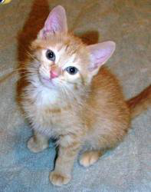

In [ ]:
img = PILImage.create(image_cat())
img.to_thumb(192)

In [ ]:
#hide_output
uploader = widgets.FileUpload()
uploader

In [ ]:

img = PILImage.create(uploader.data[0])
is_dog,_,probs = learn.predict(img)
print(f"Is this a dog?: {is_dog}.")
print(f"Probability it's a dog: {probs[1].item():.6f}")

In [ ]:
#id first_training
#caption Results from the first training
# CLICK ME
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

In [ ]:


def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.1, seed=35,
    label_func=is_cat, item_tfms=Resize(100))

learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.486046,0.223253,0.077131,11:26


epoch,train_loss,valid_loss,error_rate,time
0,0.195828,0.103178,0.041949,16:53


In [ ]:
#img = PILImage.create(image_bear())
#img.to_thumb(192)

##### used the file uploader otion to upload a dog image and check if the model is able to identify the dog image

In [ ]:
#hide_output
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

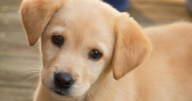

In [ ]:
img = PILImage.create(uploader.data[0])
img.to_thumb(192)
#my dog image

In [ ]:

img = PILImage.create(uploader.data[0])
is_dog,_,probs = learn.predict(img)
print(f"Is this a dog?: {is_dog}.")
print(f"Probability it's a dog: {probs[1].item():.6f}")

Is this a dog?: True.
Probability it's a dog: 0.998724


This is to print whether it is a dog and to print the probability.

In [ ]:
uploader = widgets.FileUpload()
uploader


FileUpload(value={}, description='Upload')

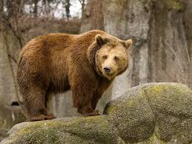

In [ ]:
img = PILImage.create(uploader.data[0])
img.to_thumb(192)

In [ ]:
##it was very difficult to guess system guessed it wrong
img = PILImage.create(uploader.data[0])
is_dog,_,probs = learn.predict(img)
print(f"Is this a dog?: {is_dog}.")
print(f"Probability it's a dog: {probs[1].item():.6f}")

Is this a dog?: True.
Probability it's a dog: 0.999757


##### Uploaded a bear image which was not high resolution and the system predicted wrong value as it was difficut to recognize

In [ ]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),

   label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',

    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,3.007784,2.576712,01:14


epoch,train_loss,valid_loss,time
0,1.934521,1.548849,01:24
1,1.652759,1.263483,01:20
2,1.446650,1.155874,01:19
3,1.305657,0.994201,01:18
4,1.172858,0.869062,01:19
5,1.061015,0.792785,01:18
6,0.970449,0.759771,01:20
7,0.898531,0.754565,01:23


In [ ]:
import numpy as np
codes = np.loadtxt(path/'codes.txt',dtype=str)
len(codes)


32

##### There a multiple objects such as pedestrians , road, fence , bicyclist tree etc which as loaded as codes which the system is going to identify

In [ ]:
custom_codes = ['Pedestrian','Road' ,'Fence','Bicyclist','Sidewalk','TrafficCone', 'Tree']

#### This is the segmentationdataloader step which takes the input from camvid dataset which is fastai datset and uses the unet learner with resnet34 to train the model.

In [ ]:

#https://medium.com/@ramitag18/image-segmentation-using-fastai-32d01318605b
#src=(SegmentationItemList.from_folder(path/"images")\.split_by_fname_file('..\valid.txt')\.label_from_func(label_func,classes=codes))

path = untar_data(URLs.CAMVID_TINY)
dls_cus = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),

   label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',

    codes = codes
)

learn_cus = unet_learner(dls_cus, resnet34)
learn_cus.fine_tune(10)
#changed the finetune

epoch,train_loss,valid_loss,time
0,2.939030,2.142843,01:15


epoch,train_loss,valid_loss,time
0,1.771590,1.393635,01:22
1,1.530454,1.170301,01:24
2,1.399180,1.368753,01:21
3,1.353744,1.049957,01:21
4,1.246156,0.829543,01:20
5,1.123398,0.756523,01:22
6,1.020704,0.718551,01:23
7,0.933027,0.698136,01:23
8,0.862193,0.686595,01:22
9,0.805647,0.687167,01:22


#### This is used to show the output of the model which shows the segmentation is colored differently for each object

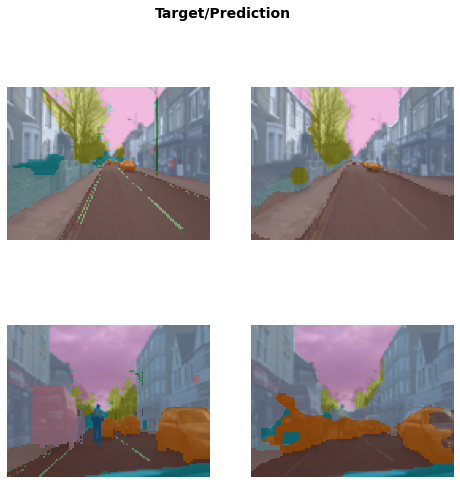

In [ ]:
learn.show_results(max_n=4, figsize=(8,8))

In [ ]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

#### In this step uploaded a image and worked on data augmentation using fastai

#### Applying Data Augmentation using Dihedralitem which rotates the images and captures them

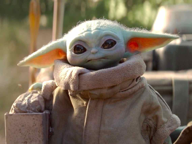

In [ ]:
img = PILImage.create(uploader.data[0])
img.to_thumb(192)

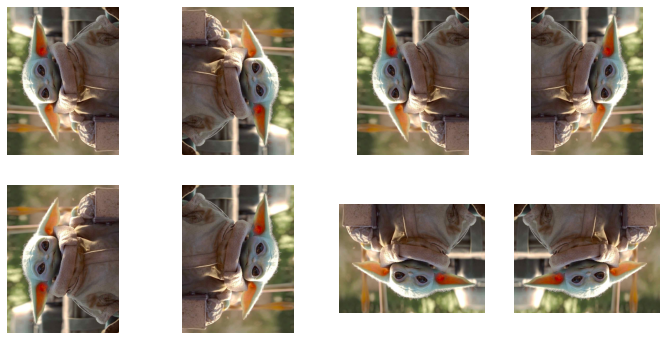

In [ ]:
_,axs = subplots(2, 4)
for ax in axs.flatten():
    show_image(DihedralItem(p=1.)(img, split_idx=0), ctx=ax)

#### TextDataloaders is to load the movie reviews data and classify 

In [ ]:
from fastai.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.7, metrics=accuracy)
learn.fine_tune(2, 1e-2)

In [ ]:

learn.predict("I did not like that hero!")

#### TabularDataloader is used to load the dataframes or csvs to train the model to predict the y label or unknown label. 



In [ ]:

from fastai.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])

learn = tabular_learner(dls, metrics=accuracy)


#https://confusedcoders.com/data-science/deep-learning/how-to-apply-deep-learning-on-tabular-data-with-fastai

In [ ]:

learn.fit_one_cycle(3)

In [ ]:
from fastai.collab import *
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range=(0.5,5.5))
learn.fine_tune(10)

In [ ]:
learn.show_results()


####  implemented using these with modifications in the code to import a different dataset (titanic dataset ) and to predict if the people in the ship was a survivor or not

In [ ]:
from google.colab import files
import pandas as pd
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
import io
df_train = pd.read_csv(io.BytesIO(uploaded['train.csv']))
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0.0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,514.0,"Montvila, Father Juozas",27.0,"Gudinė, Lithuania [76]",Southampton,"Worcester, Massachusetts, US",NaN,NaN,2.0
887,888,1.0,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,137.0,"Graham, Miss Margaret Edith",19.0,"Greenwich, Connecticut, US",Southampton,"Greenwich, Connecticut, US",3,NaN,1.0
888,889,0.0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,910.0,"Johnston, Miss Catherine Nellie",7.0,"Thornton Heath, London, England",Southampton,"New London, Connecticut, US",NaN,NaN,3.0
889,890,1.0,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,28.0,"Behr, Mr. Karl Howell",26.0,"New York, New York, US",Cherbourg,"New York, New York, US",5,NaN,1.0


In [ ]:
uploaded = files.upload()
import io
df_test = pd.read_csv(io.BytesIO(uploaded['test.csv']))
df_test

Saving test.csv to test.csv


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,928.0,"Kelly, Mr. James",19.0,"Unknown, Ireland",Southampton,New York City,NaN,70MB,3.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1297.0,"Wilkes, Mrs. Ellen",47.0,"Penzance, Cornwall, England",Southampton,"Akron, Ohio, US",16,NaN,3.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,518.0,"Myles, Mr. Thomas Francis",63.0,"Fermoy, Ireland[note 1]",Queenstown,"Waban, Massachusetts, US",NaN,NaN,2.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1303.0,"Wirz, Mr. Albert",27.0,"Uster, Switzerland",Southampton,"Beloit, Wisconsin, US",NaN,131MB,3.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,871.0,"Hirvonen, Mrs. Helga Elisabeth (née Lindqvist)",22.0,"Taalintehdas, Finland",Southampton,"Monessen, Pennsylvania, US",15,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,1227.0,"Spector, Mr. Woolf",23.0,"London, England",Southampton,New York City,NaN,NaN,3.0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,229.0,"and maid, Doña Fermina Oliva y Ocana",39.0,"Madrid, Spain",Cherbourg,"New York, New York, US",8,NaN,1.0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1169.0,"Sæther, Mr. Simon Sivertsen",43.0,"Skaun, Sør-Trøndelag, Norway",Southampton,US,NaN,32MB,3.0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,1289.0,"Ware, Mr. Frederick William",34.0,"Greenwich, London, England",Southampton,New York City,NaN,NaN,3.0


In [ ]:
from fastai import *
from fastai.tabular import *

deep_var = 'Survived'
cat_names = ['Sex' ,'Ticket' , 'Cabin' ,'Embarked']
cont_names = ['Age' ,'SibSp' ,'Parch' ,'Fare']
from fastai import *
from fastai.tabular import *

#Transformations 
from fastai.tabular import *

procs = [Categorify, FillMissing, Normalize]

from fastai.tabular.all import *
#dfpath = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_df(df_train ,path,procs=procs,y_names=deep_var,
    cat_names=cat_names,
    cont_names=cont_names, bs=64)

#learn = tabular_learner(dls, metrics=accuracy)

In [ ]:
df_train.size

18711

In [ ]:
learn = tabular_learner(dls)

In [ ]:
row, clas, probs = learn.predict(df_test.iloc[5])

In [ ]:
row.show()

,Sex,Ticket,Cabin,Embarked,Age_na,Age,SibSp,Parch,Fare,Survived
0,male,#na#,#na#,S,False,13.999999,7.414411e-09,-6.696338e-09,9.225,0.055069


This shows the class probality and the column survived

In [ ]:
clas, probs

(tensor([0.0551]), tensor([0.0551]))

##### This helped me to find the right format to input the data into the tabular function.



In [ ]:
help(tabular.data)

Help on module fastai.tabular.data in fastai.tabular:

NAME
    fastai.tabular.data - # AUTOGENERATED! DO NOT EDIT! File to edit: nbs/41_tabular.data.ipynb (unless otherwise specified).

CLASSES
    fastai.data.core.DataLoaders(fastcore.basics.GetAttr)
        TabularDataLoaders
    
    class TabularDataLoaders(fastai.data.core.DataLoaders)
     |  Basic wrapper around several `DataLoader`s with factory methods for tabular data
     |  
     |  Method resolution order:
     |      TabularDataLoaders
     |      fastai.data.core.DataLoaders
     |      fastcore.basics.GetAttr
     |      builtins.object
     |  
     |  Methods defined here:
     |  
     |  from_csv(csv, skipinitialspace=True, path='.', procs=None, cat_names=None, cont_names=None, y_names=None, y_block=None, valid_idx=None, bs=64, val_bs=None, shuffle_train=True, n=None, device=None) from builtins.type
     |      Create from `csv` file in `path` using `procs`
     |  
     |  test_dl(self, test_items, rm_type_tfms=No